<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1">
                    <span class="toc-item-num">1&nbsp;&nbsp;</span>
                    Изучение данных из файла
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2">
                    <span class="toc-item-num">2&nbsp;&nbsp;</span>
                    Предобработка данных
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Ответы-на-вопросы" data-toc-modified-id="Ответы-на-вопросы-3">
                    <span class="toc-item-num">3&nbsp;&nbsp;</span>
                    Ответы на вопросы
                </a>
            </span>
        </li>
         <li>
            <span>
                <a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>
                    Общий вывод
                </a>
            </span>
        </li>
    </ul>
</div>

# Исследование надежности заемщиков

**Описание проекта**

Заказчик — кредитный отдел банка.

**Цель исследования**

Исследовать, влияет ли семейное положение и количество детей клиента на факт возврата кредита в срок.

**Описание данных**  

Входные данные от банка — статистика о платёжеспособности клиентов `/datasets/data.csv`:

- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

## Изучение данных из файла

Импортируем `pandas`:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Прочитаем файл data.csv из папки /datasets и сохраним его в переменной data:

In [2]:
data = pd.read_csv('/datasets/data.csv')  
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Обнаружили пропущенные значения в столбцах `days_employed` и `total_income`.

In [4]:
display(pd.DataFrame(round((data.isna().mean()*100),2), columns=['NaNs, %']).style.format(
    '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
children,0.00
days_employed,10.10
dob_years,0.00
education,0.00
education_id,0.00
family_status,0.00
family_status_id,0.00
gender,0.00
income_type,0.00
debt,0.00


## Предобработка данных

**1) Заполнение пропусков**

In [5]:
data.isna().sum()  / data.shape[0]

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

In [6]:
data_income_type = data['income_type'].unique()

for item in data_income_type:
    median = data.loc[data['income_type'] == item,'total_income'].median()
    data.loc[data['income_type'] == item,'total_income'] = data.loc[data['income_type'] == item,'total_income'].fillna(median)

data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


**Вывод:**  

Были найдены пропущенные значения в столбце `total_income`.

Вывели на экран строки таблицы с пропущенными значениями в столбце `total_income` с использованием метода isna().

Далее с помощью метода median() посчитали медианное значение по столбцу `total_income` и заменили этим значением пропуски c учетом категории `income_type`, используя метод fillna().

Определили, какую долю составляют пропущенные значения в каждом из столбцов с пропусками.

Возможные причины появления пропусков в данных: человек мог не указать свой доход или его могли случайно пропустить при заполнении таблицы. Заполнить пропуски медианным значением — лучшее решение для количественных переменных, потому что среднее значение некорректно характеризует данные, когда некоторые значения сильно выделяются среди большинства.

**2) Проверка данных на аномалии и исправления**

In [7]:
data['days_employed'] = data['days_employed'].abs()
data['children'] = data['children'].abs()

data.loc[data['children'] == 20, 'children'] = 2

data['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [8]:
data_dob_years = data['dob_years'].unique()

In [9]:
for item in data_dob_years:
    median = data.loc[data['dob_years'] == item,'days_employed'].median()
    data.loc[data['dob_years'] == item,'days_employed'] = data.loc[data['dob_years'] == item,'days_employed'].fillna(median)

data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Посмотрим, какие статусы есть для семейного положения:

In [10]:
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

Типы занятости:

In [11]:
data['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

Цели взятия кредитов:

In [12]:
data['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

Определим, какое количество людей уже имело задолженность по возврату кредитов:

In [13]:
data['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

Общий трудовой стаж в днях:

In [14]:
data['days_employed'].value_counts()

1615.910188      69
1728.936706      67
1308.901135      66
1613.494818      65
2253.981630      65
                 ..
209.984794        1
398099.392433     1
1271.038880       1
1623.362064       1
1984.507589       1
Name: days_employed, Length: 19379, dtype: int64

Количество мужчин и женщин:

In [15]:
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [16]:
data['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [17]:
rows = data['gender'] == 'XNA'
display(data.loc[rows])
data = data[data['gender'] != 'XNA']

data['gender'].value_counts()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


F    14236
M     7288
Name: gender, dtype: int64

Возраст клиента в годах:

In [18]:
data['dob_years'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    263
23    254
65    194
22    183
66    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

**Вывод:**  

В данных встретились аномалии: отрицательный стаж в столбце `days_employed`. Заменили его на положительный с помощью модуля. Пропущенные значения заполнили медианным значением по этому столбцу.

В столбце `children` тоже обнаружено отрицательное количество детей. Также заменили его на положительное модулем. В этом же столбце обнаружено количество детей 20, что мало вероятно, поэтому заменили его на 2.

Были удалены строки-дубликаты методом drop_duplicates.

Были проверены остальные столбцы на наличие дубликатов. В столбце `gender` обнаружена аномалия - значение XNA, удалили всю строку.

**3) Изменение типов данных**

In [19]:
data['total_income'] = data['total_income'].astype('int')
data['days_employed'] = data['days_employed'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21524 non-null  int64 
 1   days_employed     21524 non-null  int32 
 2   dob_years         21524 non-null  int64 
 3   education         21524 non-null  object
 4   education_id      21524 non-null  int64 
 5   family_status     21524 non-null  object
 6   family_status_id  21524 non-null  int64 
 7   gender            21524 non-null  object
 8   income_type       21524 non-null  object
 9   debt              21524 non-null  int64 
 10  total_income      21524 non-null  int32 
 11  purpose           21524 non-null  object
dtypes: int32(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод:**

Заменили вещественный тип данных (float64) в столбцах `total_income` и `days_employed` на целочисленный (int64) с помощью метода astype.

**4) Удаление дубликатов**

In [20]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21470 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21470 non-null  int64 
 1   days_employed     21470 non-null  int32 
 2   dob_years         21470 non-null  int64 
 3   education         21470 non-null  object
 4   education_id      21470 non-null  int64 
 5   family_status     21470 non-null  object
 6   family_status_id  21470 non-null  int64 
 7   gender            21470 non-null  object
 8   income_type       21470 non-null  object
 9   debt              21470 non-null  int64 
 10  total_income      21470 non-null  int32 
 11  purpose           21470 non-null  object
dtypes: int32(2), int64(5), object(5)
memory usage: 2.0+ MB


In [21]:
data['education'].value_counts()

среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      667
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

В столбце `education` приведем все значения к нижнему регистру:

In [22]:
data['education'] = data['education'].str.lower()
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


Проверим еще раз на полные дубликатов .duplicated().sum().

In [23]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

**Вывод:**

В столбце `education` были найдены и посчитаны неявные дубликаты методом value_counts(). Затем дубликаты были приведены к одному регистру методом .str.lower().

**5) Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма**

In [24]:
education = data[['education', 'education_id']].drop_duplicates()
education.head()

,education,education_id
0,высшее,0
1,среднее,1
13,неоконченное высшее,2
31,начальное,3
2963,ученая степень,4


In [25]:
family = data[['family_status', 'family_status_id']].drop_duplicates()
family.head()

,family_status,family_status_id
0,женат / замужем,0
4,гражданский брак,1
18,вдовец / вдова,2
19,в разводе,3
24,Не женат / не замужем,4


In [26]:
data = data.drop(columns=['education', 'family_status'])
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


**Вывод:**

Были созданы два новых датафрейма: `education_table` и `family`.
В первом каждому уникальному значению из education соответствует уникальное значение education_id.
Во втором каждому уникальному значению из family_status соответствует уникальное значение family_status_id.

Из исходного датафрейма (data) удалены столбцы education и family_status методом drop.

**6) Категоризация дохода**

In [27]:
def total_income_category(item):
    if item <= 30000:
        return 'E'
    if item <= 50000:
        return 'D'
    if item <= 200000:
        return 'C'
    if item <= 1000000:
        return 'B'
    return 'A'
display(total_income_category(235000)) #проверка

data['total_income_category'] = data['total_income'].apply(total_income_category)
data

'B'

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C
...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43,1,1,F,компаньон,0,224791,операции с жильем,B
21521,0,343937,67,1,0,F,пенсионер,0,155999,сделка с автомобилем,C
21522,1,2113,38,1,1,M,сотрудник,1,89672,недвижимость,C
21523,3,3112,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,B


**Вывод:**

Был создан столбец `total_income_category` с разделением дохода (столбец `total_income`) по категориям. Для этого использовалась функция и условный оператор if.

**7) Категоризация целей кредита**

In [28]:
def purpose_category(purpose):
    if 'автомоб' in purpose:
        return 'операции с автомобилем'
    if 'образов' in purpose:
        return 'получение образования'
    if 'недвиж' in purpose or 'жилье' in purpose:
        return 'операции с недвижимостью'
    if 'свадьб' in purpose:
        return 'проведение свадьбы'
    
data['purpose_category'] = data['purpose'].apply(purpose_category)
data['purpose_category'].value_counts()

операции с недвижимостью    7648
операции с автомобилем      4306
получение образования       4013
проведение свадьбы          2324
Name: purpose_category, dtype: int64

**Вывод:**

Создана функция, которая на основании данных из столбца `purpose` формирует новый столбец `purpose_category` с перечисленными категориями.

## Ответы на вопросы

**Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [29]:
data_pivot = data.pivot_table(index='children', values='debt', aggfunc=['count', 'sum', 'mean'])
data_pivot.columns = [tup[0] if tup[0] else tup[1] for tup in data_pivot.columns]
data_pivot = data_pivot.reset_index()
data_pivot
data_pivot.rename(columns = {'children' : 'Количество детей', 'count' : 'Всего кредитополучателей', 'sum' : 'Всего должников', 'mean' : 'Доля должников'}, inplace = True)
data_pivot.head(10)

,Количество детей,Всего кредитополучателей,Всего должников,Доля должников
0,0,14090,1063,0.075444
1,1,4855,445,0.091658
2,2,2128,202,0.094925
3,3,330,27,0.081818
4,4,41,4,0.097561
5,5,9,0,0.000000


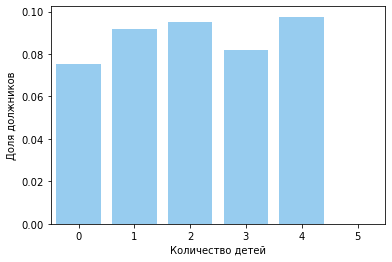

In [30]:
sns.barplot(data=data_pivot, x='Количество детей', y='Доля должников', color='#89CFFD')
plt.show()

**Вывод:**
  
Среди людей без детей наименьшая доля должников. Они возвращают кредиты в срок чаще, чем люди с детьми.
Больше всего должников среди людей с 4 детьми. Их доля составляет 0.097561.
Людей с 5 детьми очень мало (9 человек), данных недостаточно для того, чтобы сделать какие-то выводы по этой категории.

**Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [31]:
family_group = data.groupby(['family_status_id']).agg({'debt':'mean'})
family_group

data_new = data.merge(family, on='family_status_id', how='left')
data_pivot = data_new.pivot_table(index='family_status', values='debt', aggfunc=['count', 'sum', 'mean'])
data_pivot.columns = [tup[0] if tup[0] else tup[1] for tup in data_pivot.columns]
data_pivot = data_pivot.reset_index()
data_pivot.rename(columns = {'family_status' : 'Семейное положение', 'count' : 'Всего кредитополучателей', 'sum' : 'Всего должников', 'mean' : 'Доля должников'}, inplace = True)
data_pivot = data_pivot.sort_values(by='Доля должников', ascending=False)
data_pivot.head(10)

,Семейное положение,Всего кредитополучателей,Всего должников,Доля должников
0,Не женат / не замужем,2810,274,0.097509
3,гражданский брак,4150,388,0.093494
4,женат / замужем,12339,931,0.075452
1,в разводе,1195,85,0.071130
2,вдовец / вдова,959,63,0.065693


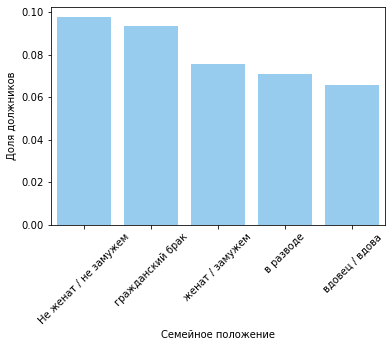

In [32]:
sns.barplot(data=data_pivot, x='Семейное положение', y='Доля должников', color='#89CFFD')
plt.xticks(rotation=45)
plt.show()

**Вывод:**

Больше всего должников среди не женатых (не замужних) и тех, кто находится в гражанском браке. Их доли примерно одинаковы (0.097509 и 0.093494 соответственно).

Меньше всего задолжносстей за кредит у вдов (вдовцов). Их доля равна 0.065693.

**Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [33]:
data_pivot = data.pivot_table(index='total_income_category', values='debt', aggfunc=['count', 'sum', 'mean'])
data_pivot.columns = [tup[0] if tup[0] else tup[1] for tup in data_pivot.columns]
data_pivot = data_pivot.reset_index()
data_pivot
data_pivot.rename(columns = {'total_income_category' : 'Уровень дохода', 'count' : 'Всего кредитополучателей', 'sum' : 'Всего должников', 'mean' : 'Доля должников'}, inplace = True)
data_pivot = data_pivot.sort_values(by='Доля должников', ascending=False)
data_pivot.head(10)

,Уровень дохода,Всего кредитополучателей,Всего должников,Доля должников
4,E,22,2,0.090909
2,C,16015,1360,0.084920
0,A,25,2,0.080000
1,B,5041,356,0.070621
3,D,350,21,0.060000


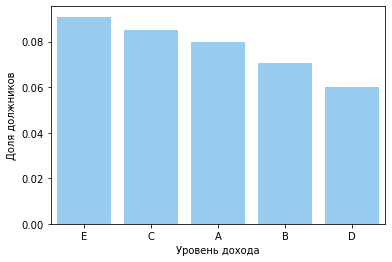

In [34]:
sns.barplot(data=data_pivot, x='Уровень дохода', y='Доля должников', color='#89CFFD')
plt.show()

**Вывод:**

Клиенты из категории D чаще всего возвращают кредиты. Среди них меньше всего должников (0.06). Больше всего должников в категории Е (0.09).

**Вопрос 4: Как разные цели кредита влияют на его возврат в срок?**

In [35]:
data_pivot = data.pivot_table(index='purpose_category', values='debt', aggfunc=['count', 'sum', 'mean'])
data_pivot.columns = [tup[0] if tup[0] else tup[1] for tup in data_pivot.columns]
data_pivot = data_pivot.reset_index()
data_pivot
data_pivot.rename(columns = {'purpose_category' : 'Цели кредита', 'count' : 'Всего кредитополучателей', 'sum' : 'Всего должников', 'mean' : 'Доля должников'}, inplace = True)
data_pivot = data_pivot.sort_values(by='Доля должников', ascending=False)
data_pivot.head(10)

,Цели кредита,Всего кредитополучателей,Всего должников,Доля должников
0,операции с автомобилем,4306,403,0.093590
2,получение образования,4013,370,0.092200
3,проведение свадьбы,2324,186,0.080034
1,операции с недвижимостью,7648,568,0.074268


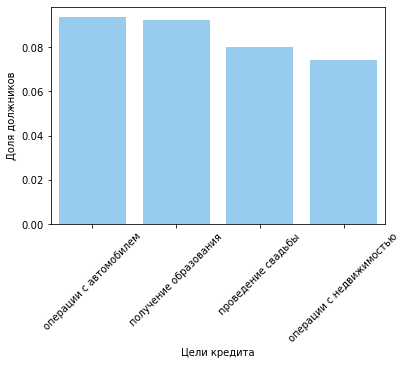

In [36]:
sns.barplot(data=data_pivot, x='Цели кредита', y='Доля должников', color='#89CFFD')
plt.xticks(rotation=45)
plt.show()

**Вывод:**

Клиенты с целью "операции с недвижимостью" чаще всего возвращают кредиты. Доля должников среди них наименьшая (0.074268).

Больше всего должников среди людей с целями "операции с автомобилем" (их доля составляет 0.093) и "получение образования" (0.092).

## Общий вывод

Изучив данные, можно ответить на 2 основных вопроса, указанных в описании проекта: влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.

Да, семейное положение влияет на факт погашения кредита. Больше всего должников среди не женатых (не замужних) и тех, кто находится в гражанском браке. Их доли примерно равны (0.097509 и 0.093494 соответственно). Меньше всего задолжносстей за кредит у вдов (вдовцов). Их доля равна 0.065693.

Среди людей без детей меньше всего должников. Они возвращают кредиты в срок чаще, чем люди с детьми. Больше всего должников среди людей с 4 детьми. Их доля составляет 0.097561. Людей с 5 детьми очень мало (9 человек), этих данных недостаточно для того, чтобы сделать какие-то выводы по текущей категории.